# Alucar - Analisando as vendas

In [43]:
import pandas as pd

In [44]:
alucar = pd.read_csv('data/alucar.csv')

In [45]:
alucar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   mes     24 non-null     object
 1   vendas  24 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 512.0+ bytes


In [46]:
alucar.shape

(24, 2)

In [47]:
alucar.count()

mes       24
vendas    24
dtype: int64

In [48]:
alucar.isna().sum().sum()

0

In [49]:
alucar.dtypes

mes       object
vendas     int64
dtype: object

In [50]:
alucar['mes'] = pd.to_datetime(alucar.mes)
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [51]:
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [52]:
import seaborn as sns

In [53]:
%matplotlib inline

In [54]:
from matplotlib import pyplot as plt

In [55]:
sns.__version__

'0.11.0'

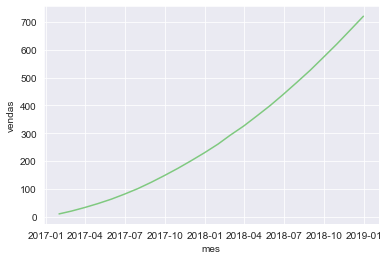

In [56]:
ax = sns.lineplot(x='mes',y='vendas',data=alucar)

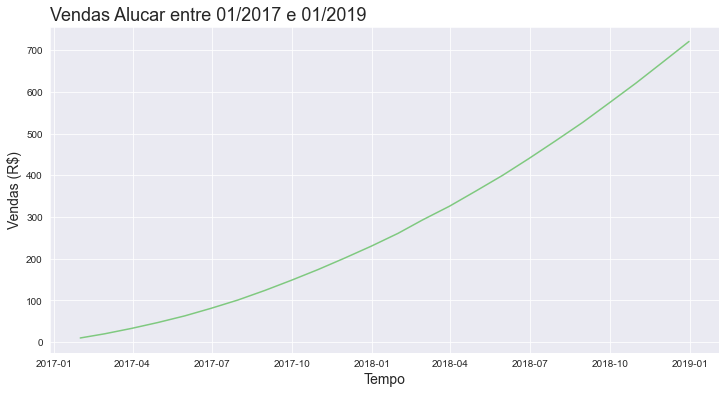

In [57]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes',y='vendas',data=alucar)
ax.figure.set_size_inches(12,6)
ax.set_title('Vendas Alucar entre 01/2017 e 01/2019',loc='left',fontsize=18)
ax.set_xlabel('Tempo',fontsize=14)
ax.set_ylabel('Vendas (R$)',fontsize=14)
ax=ax

In [58]:
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [59]:
alucar['aumento'] = alucar['vendas'].diff()

In [60]:
alucar.head()

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


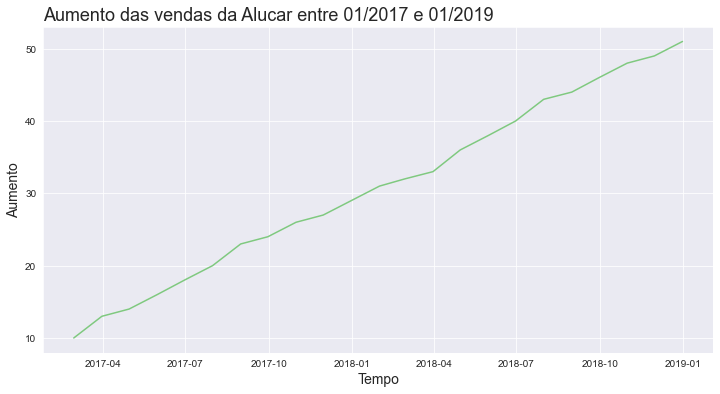

In [61]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes',y='aumento',data=alucar)
ax.figure.set_size_inches(12,6)
ax.set_title('Aumento das vendas da Alucar entre 01/2017 e 01/2019',loc='left',fontsize=18)
ax.set_xlabel('Tempo',fontsize=14)
ax.set_ylabel('Aumento',fontsize=14)
ax=ax

In [62]:
def plotar(titulo,labelx,labely,x,y,dataset):
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    ax = sns.lineplot(x=x,y=y,data=dataset)
    ax.figure.set_size_inches(12,6)
    ax.set_title(titulo,loc='left',fontsize=18)
    ax.set_xlabel(labelx,fontsize=14)
    ax.set_ylabel(labely,fontsize=14)
    ax=ax

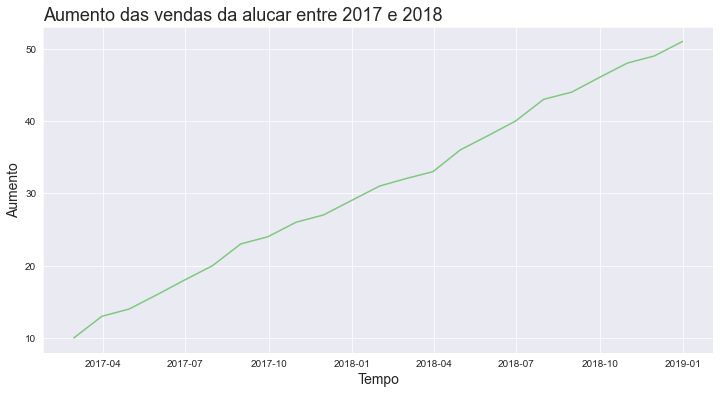

In [63]:
plotar('Aumento das vendas da alucar entre 2017 e 2018','Tempo','Aumento','mes','aumento',alucar)

In [64]:
alucar['aceleracao'] = alucar['aumento'].diff()
alucar.head()

,mes,vendas,aumento,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


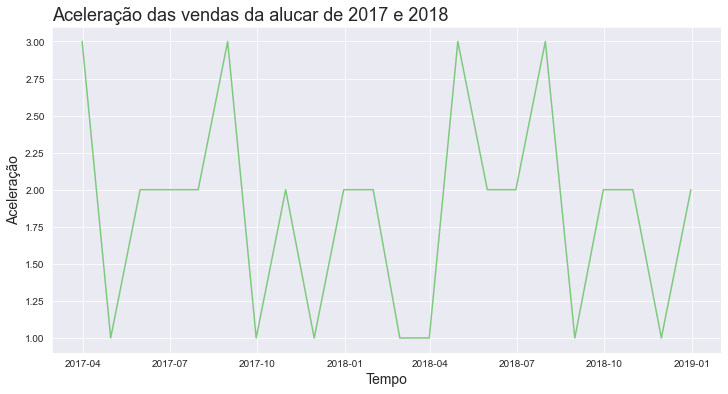

In [65]:
plotar('Aceleração das vendas da alucar de 2017 e 2018','Tempo','Aceleração','mes','aceleracao',alucar)

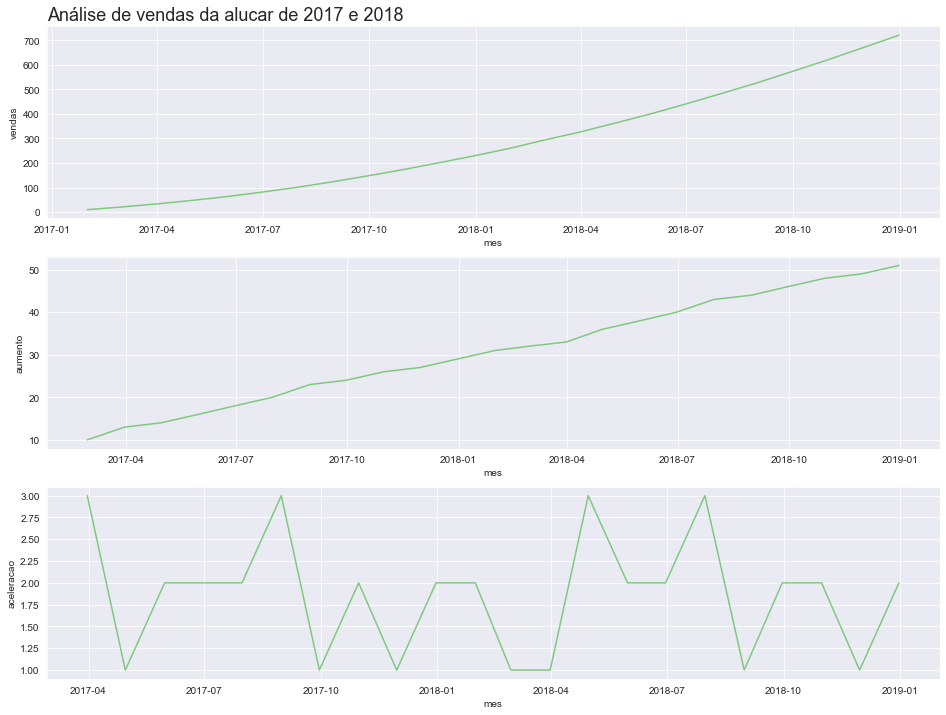

In [66]:
plt.figure(figsize=(16,12))
ax = plt.subplot(3,1,1)
ax.set_title('Análise de vendas da alucar de 2017 e 2018',fontsize=18,loc='left')
sns.lineplot(x='mes',y='vendas',data=alucar)
plt.subplot(3,1,2)
sns.lineplot(x='mes',y='aumento',data=alucar)
plt.subplot(3,1,3)
sns.lineplot(x='mes',y='aceleracao',data=alucar)
ax=ax

In [67]:
def plot_comparacao(x,y1,y2,y3,dataset,titulo):
    plt.figure(figsize=(16,12))
    ax = plt.subplot(3,1,1)
    ax.set_title(titulo,fontsize=18,loc='left')
    sns.lineplot(x=x,y=y1,data=dataset)
    plt.subplot(3,1,2)
    sns.lineplot(x=x,y=y2,data=dataset)
    plt.subplot(3,1,3)
    sns.lineplot(x=x,y=y3,data=dataset)
    ax=ax

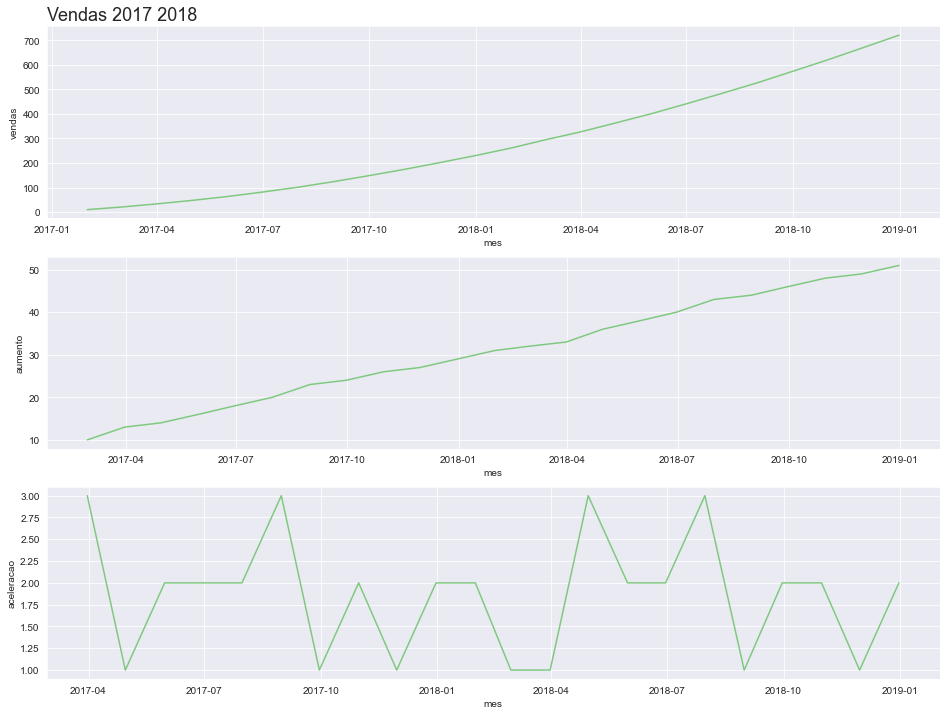

In [68]:
plot_comparacao('mes','vendas','aumento','aceleracao',alucar,'Vendas 2017 2018')

In [69]:
from pandas.plotting import autocorrelation_plot

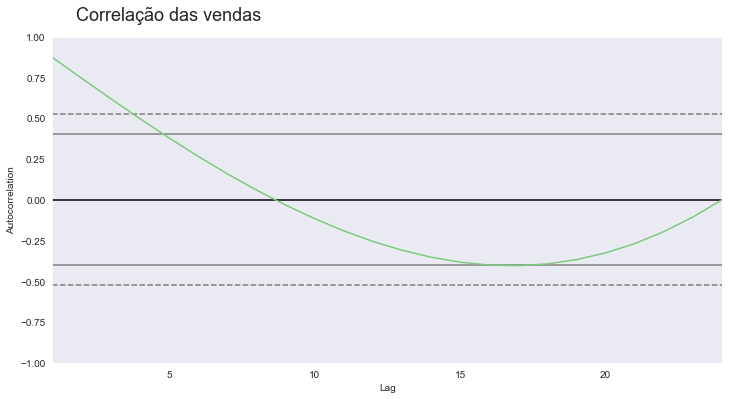

In [70]:
ax=plt.figure(figsize=(12,6))
ax.suptitle('Correlação das vendas', fontsize='18',x=0.26,y=0.95)
autocorrelation_plot(alucar['vendas'])
ax=ax

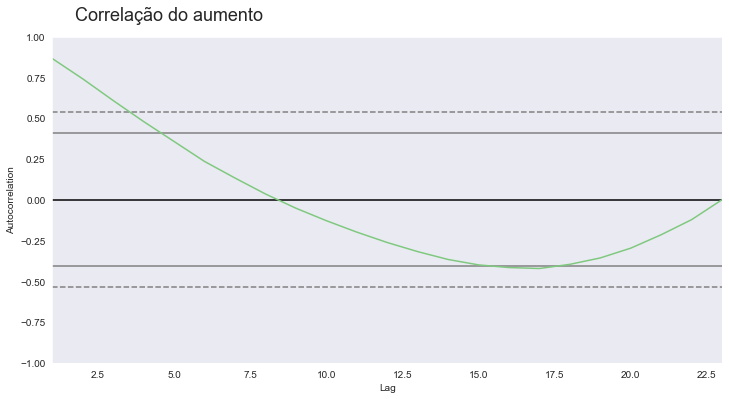

In [71]:
ax=plt.figure(figsize=(12,6))
ax.suptitle('Correlação do aumento', fontsize='18',x=0.26,y=0.95)
autocorrelation_plot(alucar['aumento'][1:])
ax=ax

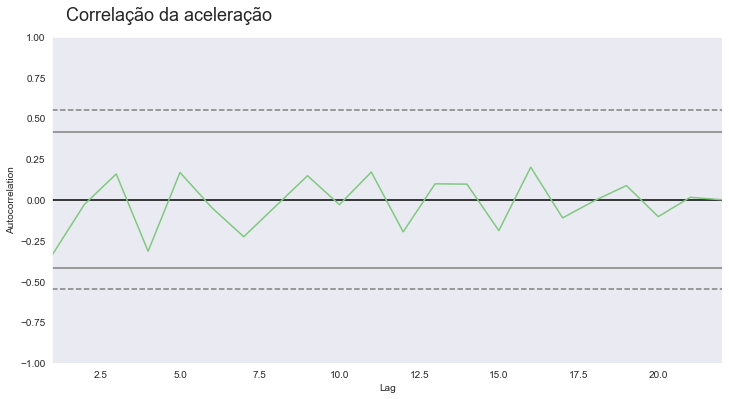

In [72]:
ax=plt.figure(figsize=(12,6))
ax.suptitle('Correlação da aceleração', fontsize='18',x=0.26,y=0.95)
autocorrelation_plot(alucar['aceleracao'][2::])
ax=ax

In [73]:
assinantes = pd.read_csv('data/newsletter_alucar.csv')
assinantes.head()

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49


In [74]:
assinantes.dtypes

mes           object
assinantes     int64
dtype: object

In [75]:
print('Quantidade de linhas e colunas ',assinantes.shape)

Quantidade de linhas e colunas  (24, 2)


In [77]:
print('Quantidade de registros nulo\n ', assinantes.isna().sum())

Quantidade de registros nulo  mes           0
assinantes    0
dtype: int64


In [79]:
assinantes['mes'] = pd.to_datetime(assinantes['mes'])

In [81]:
assinantes.dtypes

mes           datetime64[ns]
assinantes             int64
dtype: object

In [82]:
assinantes['aumento'] = assinantes.assinantes.diff()
assinantes['aceleracao'] = assinantes.aumento.diff()
assinantes.head()

,mes,assinantes,aumento,aceleracao
0,2017-01-31,0,NaN,NaN
1,2017-02-28,10,10.0,NaN
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0


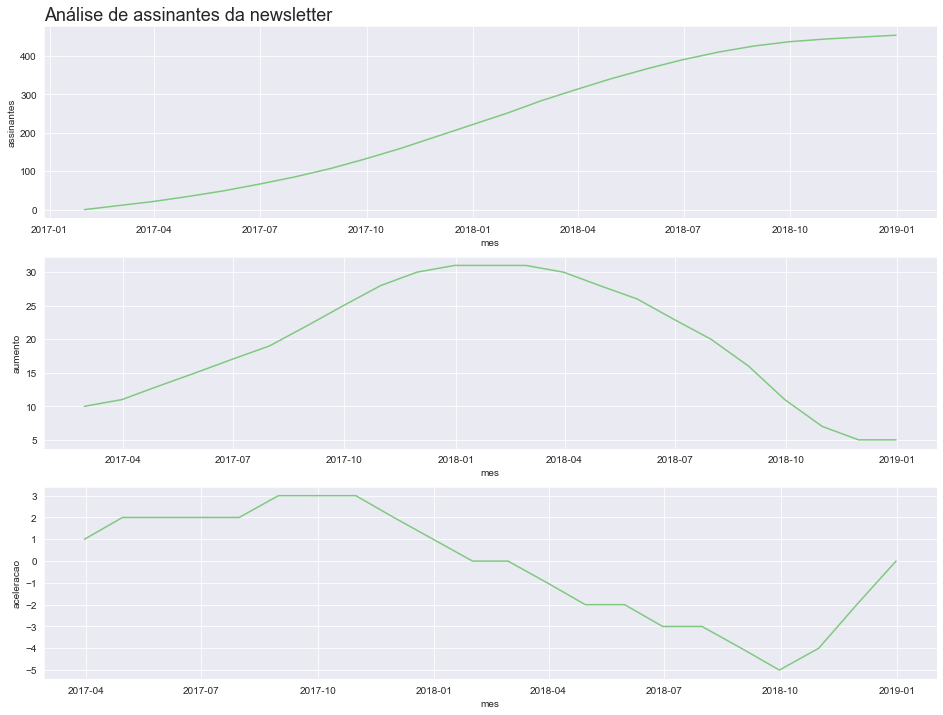

In [84]:
plot_comparacao('mes','assinantes','aumento','aceleracao',assinantes,'Análise de assinantes da newsletter')

# Chocolura

In [85]:
chocolura = pd.read_csv('data/chocolura.csv')
chocolura

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211
5,2017-06,300
6,2017-07,210
7,2017-08,205
8,2017-09,208
9,2017-10,210


In [86]:
chocolura.dtypes

mes       object
vendas     int64
dtype: object

In [87]:
chocolura.mes = pd.to_datetime(chocolura.mes)

In [88]:
chocolura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [90]:
chocolura.isna().sum()

mes       0
vendas    0
dtype: int64

In [91]:
chocolura.shape

(24, 2)

In [95]:
chocolura['aumento'] = chocolura.vendas.diff()

In [96]:
chocolura['aceleracao'] = chocolura.aumento.diff()

In [97]:
chocolura.head()

,mes,vendas,aumento,aceleracao
0,2017-01-01,210,NaN,NaN
1,2017-02-01,185,-25.0,NaN
2,2017-03-01,209,24.0,49.0
3,2017-04-01,280,71.0,47.0
4,2017-05-01,211,-69.0,-140.0


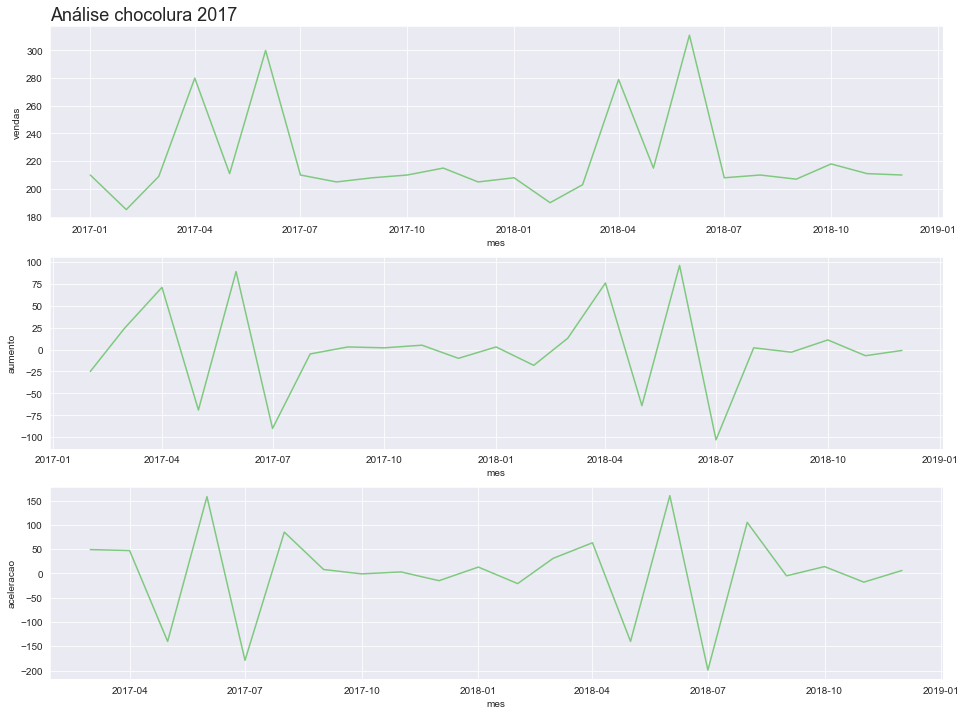

In [98]:
plot_comparacao('mes','vendas','aumento','aceleracao',chocolura,'Análise chocolura 2017')